In [1]:
!pip install tweepy
!pip install pymongo
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import pymongo
import ipywidgets as wgt
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
import re
from datetime import datetime


In [2]:
api_key = "1dSWQ7sR4VzVcx0GmLBZwLN7t" # <---- Add your API Key
api_secret = "ngma3SLArKBPgtTAu5RP88SwBpKPVZhUSwhAsFHP4Dw0c0zu56" # <---- Add your API Secret
access_token = "1089121501897342977-4t0Rv3crUu6kDTOInQKJfeQeX0WCtq" # <---- Add your access token
access_token_secret = "hpr7WwHndEwFhd68XjCsKpMLBkIGraAv5TRmUNU5QKGL3" # <---- Add your access token secret

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
col = pymongo.MongoClient()["blackpink"]["kpop"]
col.count()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  # This is added back by InteractiveShellApp.init_path()


20

In [3]:
class MyStreamListener(tweepy.StreamListener):
    
    counter = 0
    
    def __init__(self, max_tweets=5000, *args, **kwargs):
        self.max_tweets = max_tweets
        self.counter = 0
        super().__init__(*args, **kwargs)
    
    def on_connect(self):
        self.counter = 0
        self.start_time = datetime.now()
    
    def on_status(self, status):
        # Increment counter
        self.counter += 1
        
        # Store tweet to MongoDB
        col.insert_one(status._json)
        
        
        if self.counter % 1 == 0:
            value = int(100.00 * self.counter / self.max_tweets)
            mining_time = datetime.now() - self.start_time
            progress_bar.value = value
            html_value = """<span class="label label-primary">Tweets/Sec: %.1f</span>""" % (self.counter / max([1,mining_time.seconds]))
            html_value += """ <span class="label label-success">Progress: %.1f%%</span>""" % (self.counter / self.max_tweets * 100.0)
            html_value += """ <span class="label label-info">ETA: %.1f Sec</span>""" % ((self.max_tweets - self.counter) / (self.counter / max([1,mining_time.seconds])))
            wgt_status.value = html_value
            #print("%s/%s" % (self.counter, self.max_tweets))
            if self.counter >= self.max_tweets:
                myStream.disconnect()
                print("Finished")
                print("Total Mining Time: %s" % (mining_time))
                print("Tweets/Sec: %.1f" % (self.max_tweets / mining_time.seconds))
                progress_bar.value = 0
                
    
myStreamListener = MyStreamListener(max_tweets=5000)
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
keywords = [
            "Lisa","Jennie","Rose","Jisoo","Black Pink"]

# Visualize a progress bar to track progress
progress_bar = wgt.IntProgress(value=0)
display(progress_bar)
wgt_status = wgt.HTML(value="""<span class="label label-primary">Tweets/Sec: 0.0</span>""")
display(wgt_status)

# Start a filter with an error counter of 20
for error_counter in range(20):
    try:
        myStream.filter(track=keywords)
        print("Tweets collected: %s" % myStream.listener.counter)
        print("Total tweets in collection: %s" % col.count())
        break
    except:
        print("ERROR# %s" % (error_counter + 1))

IntProgress(value=0)

HTML(value='<span class="label label-primary">Tweets/Sec: 0.0</span>')

Finished
Total Mining Time: 0:10:33.164890
Tweets/Sec: 7.9
Tweets collected: 5000
Total tweets in collection: 5020


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere


In [4]:
col.find_one()


{'_id': ObjectId('5f867099126c51d7900b44b4'),
 'created_at': 'Wed Oct 14 03:29:23 +0000 2020',
 'id': 1316219524190928900,
 'id_str': '1316219524190928900',
 'text': 'RT @essel_sweets: ＼フォロー&amp;RTキャンペーン／\n＃エッセルスーパーカップSweets からさつまいものおいしさがぎゅっと詰まった ＃スイートポテト が新発売。\nオリジナルQUOカードが当たる ＃RTキャンペーン 実施中!\n\n1.@essel_sweetsをフ…',
 'source': '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 983929231653482496,
  'id_str': '983929231653482496',
  'name': 'リベロスズキ',
  'screen_name': 'liberosuzuki',
  'location': None,
  'url': None,
  'description': None,
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 4,
  'friends_count': 262,
  'listed_count': 0,
  'favourites_count': 20,
  'statuses_count': 1780,
  'created_at': 'Wed Apr 

In [5]:

dataset = [{"created_at": item["created_at"],
            "text": item["text"],
            "user": "@%s" % item["user"]["screen_name"],
            "source": item["source"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset = pd.DataFrame(dataset)
dataset

,created_at,text,user,source,lang
0,Wed Oct 14 03:29:23 +0000 2020,RT @essel_sweets: ＼フォロー&amp;RTキャンペーン／\n＃エッセルスー...,@liberosuzuki,"<a href=""http://twitter.com/#!/download/ipad"" ...",ja
1,Wed Oct 14 03:29:23 +0000 2020,RT @BLACKPINKhappen: Manifesting acoustic vers...,@Bbysweet_12,"<a href=""http://twitter.com/download/android"" ...",en
2,Wed Oct 14 03:29:27 +0000 2020,"RT @jkshub: When the documentary comes out, ma...",@IMABLACKPINK,"<a href=""http://twitter.com/download/iphone"" r...",en
3,Wed Oct 14 03:29:27 +0000 2020,RT @BLACKPINKhappen: Manifesting acoustic vers...,@bechyroo,"<a href=""http://twitter.com/download/android"" ...",en
4,Wed Oct 14 03:29:30 +0000 2020,"RT @chartdata: .@BLACKPINK's ""Lovesick Girls"" ...",@roseannealldway,"<a href=""http://twitter.com/download/android"" ...",en
...,...,...,...,...,...
5015,Wed Oct 14 03:43:17 +0000 2020,"#Ask_BLACKPINK Lisa, Rose and Jisoo, what conc...",@isforvianaa,"<a href=""http://twitter.com/download/iphone"" r...",en
5016,Wed Oct 14 03:43:17 +0000 2020,"RT @ifscoldplay: oi, minha conta foi suspensa ...",@syrewolfhard,"<a href=""http://twitter.com/download/iphone"" r...",pt
5017,Wed Oct 14 03:43:17 +0000 2020,RT @maylalice: Lisa jokes: I hope you choose m...,@jennieownsmeee,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en
5018,Wed Oct 14 03:43:17 +0000 2020,lisa pqp parece q é outra pessoa,@beazinhatrem,"<a href=""http://twitter.com/download/iphone"" r...",pt


In [6]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(dataset.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

,word,count
0,rt,3915
1,https,2225
2,lisa,2125
3,co,2096
4,the,1727
5,blackpink,1274
6,to,1195
7,jennie,1191
8,and,856
9,jisoo,855


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


Cheap Bots, Done Quick!        3
ArtPal                         3
Microsoft Power Platform       4
WordPress.com                  5
TweetDeck                     10
twittbot.net                  12
Twitter for iPad             101
Twitter Web App              629
Twitter for iPhone          1676
Twitter for Android         2496
Name: source, dtype: int64

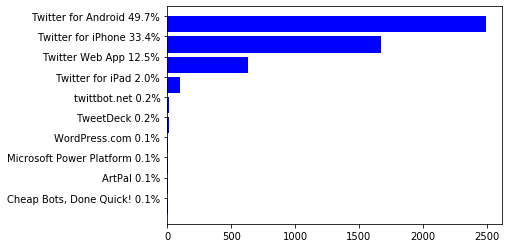

In [7]:

def get_source_name(x):
    value = re.findall(pattern="<[^>]+>([^<]+)</a>", string=x)
    if len(value) > 0:
        return value[0]
    else:
        return ""
dataset.source_name = dataset.source.apply(get_source_name)

source_counts = dataset.source_name.value_counts().sort_values()[-10:]

bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color="blue", linewidth=0)

y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(dataset)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)

source_counts

tl       43
fr       47
und     135
ko      137
pt      250
in      251
th      267
es      281
ja      344
en     3145
Name: lang, dtype: int64

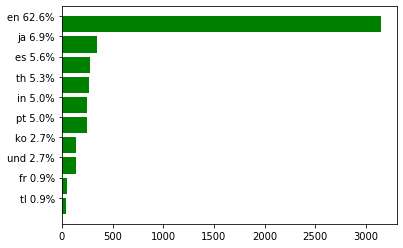

In [8]:
lang_counts = dataset.lang.value_counts().sort_values()[-10:]
bottom = [index for index, item in enumerate(lang_counts.index)]
plt.barh(bottom, width=lang_counts, color="green", linewidth=0)
y_labels = ["%s %.1f%%" % (item, 100.0*lang_counts[item]/len(dataset)) for index,item in enumerate(lang_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
lang_counts

In [9]:

from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [10]:
dataset1 = [{"id": item["id"],
            "text": item["text"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset1 = pd.DataFrame(dataset1)
is_dataset1=dataset1.lang=="en"
dataset1=dataset1[is_dataset1]
dataset1

,id,text,lang
1,1316219525939953666,RT @BLACKPINKhappen: Manifesting acoustic vers...,en
2,1316219542939418624,"RT @jkshub: When the documentary comes out, ma...",en
3,1316219543241461762,RT @BLACKPINKhappen: Manifesting acoustic vers...,en
4,1316219554616365056,"RT @chartdata: .@BLACKPINK's ""Lovesick Girls"" ...",en
5,1316219556919091200,RT @GlobalBlackPink: Show! Music Core x MuBeat...,en
...,...,...,...
5013,1316223018704809986,RT @viewspicxs: Will Smith and Lisa https://t....,en
5014,1316223021003100160,unlasting by LiSA #NowPlaying https://t.co/4LX...,en
5015,1316223022102183942,"#Ask_BLACKPINK Lisa, Rose and Jisoo, what conc...",en
5017,1316223022601125888,RT @maylalice: Lisa jokes: I hope you choose m...,en


In [11]:
!pip install textblob
from  textblob import TextBlob


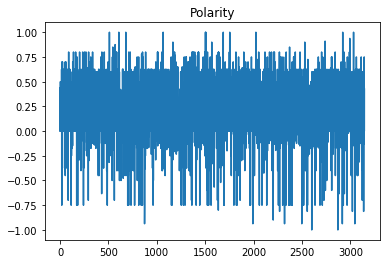

In [12]:
tweettext=dataset1['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet.polarity.plot(title='Polarity')
plt.show()

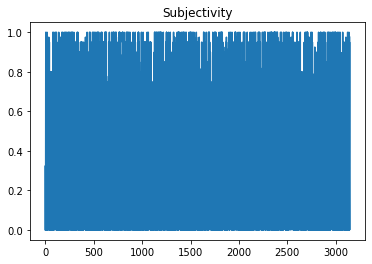

In [13]:
poltweet.subjectivity.plot(title='Subjectivity')
plt.show()

In [14]:
import statistics
statistics.mean(poltweet.polarity)

0.17836108321172658

In [15]:
import statistics
statistics.mean(poltweet.subjectivity)

0.4608279427323545